In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# 1]to predict Species values by using independent variables

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df['Id'].nunique()

150

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.drop(['Species'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:xlabel='Species', ylabel='count'>

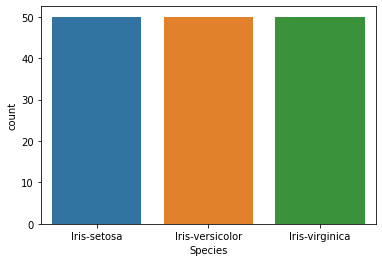

In [11]:
x=df.drop(['Species'],axis=1)
y=df["Species"]
sns.countplot(x =df['Species'])

<AxesSubplot:>

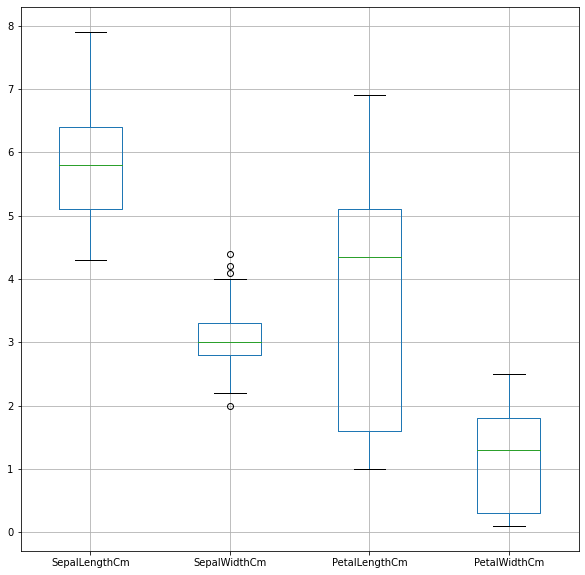

In [12]:
plt.figure(figsize=(10,10))
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].boxplot()

<AxesSubplot:xlabel='SepalWidthCm'>

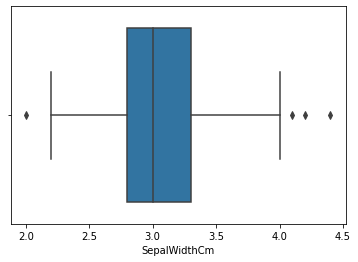

In [13]:
sns.boxplot(df['SepalWidthCm'])

In [14]:
# finding extreme outliers
q1=df['SepalWidthCm'].quantile(0.25)
q2=df['SepalWidthCm'].quantile(0.50)
q3=df['SepalWidthCm'].quantile(0.75)
median=df['SepalWidthCm'].median()
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1:',q1)
print('q2:',q2)
print('q3:',q3)
print('*'*80)
print('median:',median)
print('*'*80)
print('lower_tail:',lower_tail)
print('upper_tail:',upper_tail)

q1: 2.8
q2: 3.0
q3: 3.3
********************************************************************************
median: 3.0
********************************************************************************
lower_tail: 2.05
upper_tail: 4.05


In [15]:
df.loc[df['SepalWidthCm']>upper_tail]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [16]:
medium_SepalWidthCm=df.loc[df['SepalWidthCm']<= upper_tail,'SepalWidthCm'].median()
medium_SepalWidthCm

3.0

In [17]:
df.loc[df['SepalWidthCm']>upper_tail,'SepalWidthCm']=medium_SepalWidthCm
df.loc[df['SepalWidthCm']>upper_tail,'SepalWidthCm']

Series([], Name: SepalWidthCm, dtype: float64)

In [18]:
df.loc[df['SepalWidthCm']<lower_tail]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [19]:
df.loc[df['SepalWidthCm']<lower_tail,'SepalWidthCm']=medium_SepalWidthCm
df.loc[df['SepalWidthCm']<lower_tail,'SepalWidthCm']

Series([], Name: SepalWidthCm, dtype: float64)

<AxesSubplot:xlabel='SepalWidthCm'>

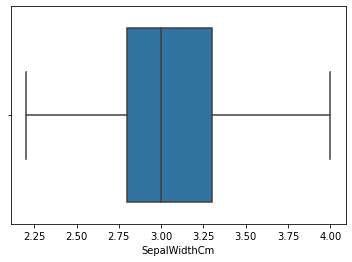

In [20]:
sns.boxplot(df['SepalWidthCm'])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.3,shuffle=True)

In [22]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [23]:
# Testing
y_pred = log_clf.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
 Accuracy : 0.9777777777777777
Classication Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [24]:
# Trainig
y_pred = log_clf.predict(x_train)
con_mat = confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",con_mat)
accuracy_train = accuracy_score(y_train,y_pred)
print(" Accuracy :",accuracy_train)
clf_report = classification_report(y_train,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[30  0  0]
 [ 0 34  2]
 [ 0  1 38]]
 Accuracy : 0.9714285714285714
Classication Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        30
Iris-versicolor       0.97      0.94      0.96        36
 Iris-virginica       0.95      0.97      0.96        39

       accuracy                           0.97       105
      macro avg       0.97      0.97      0.97       105
   weighted avg       0.97      0.97      0.97       105



In [25]:
result_dict = {'accuracy_train':[],'accuracy_test': []}
index = []

In [26]:
# Logestic Regression
result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('logistic_reg')

# logistic model oversampling

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
x = df.drop('Species',axis = 1)
y = df['Species']
smt = SMOTE()
x_new,y_new = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.25,random_state=22,shuffle=True)

In [29]:
log_model_over = LogisticRegression()
log_model_over.fit(x_train,y_train)

LogisticRegression()

In [30]:
# Testing
y_pred = log_model_over.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",con_mat)
accuracy_test = accuracy_score(y_test,y_pred)
print(" Accuracy :",accuracy_test)
clf_report = classification_report(y_test,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[11  0  0]
 [ 0 13  0]
 [ 0  2 12]]
 Accuracy : 0.9473684210526315
Classication Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [31]:
# Trainig
y_pred = log_model_over.predict(x_train)
con_mat = confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",con_mat)
accuracy_train = accuracy_score(y_train,y_pred)
print(" Accuracy :",accuracy_train)
clf_report = classification_report(y_train,y_pred)
print("Classication Report : \n",clf_report)

Confusion Matrix :
 [[39  0  0]
 [ 0 35  2]
 [ 0  2 34]]
 Accuracy : 0.9642857142857143
Classication Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.95      0.95      0.95        37
 Iris-virginica       0.94      0.94      0.94        36

       accuracy                           0.96       112
      macro avg       0.96      0.96      0.96       112
   weighted avg       0.96      0.96      0.96       112



In [32]:
# Logestic_Regression_After_Oversampling
result_dict['accuracy_train'].append(accuracy_test)
result_dict['accuracy_test'].append(accuracy_train)
index.append('logistic_after_oversampling')

In [33]:
Final_Result_df = pd.DataFrame(result_dict,index =index )
Final_Result_df

,accuracy_train,accuracy_test
logistic_reg,0.977778,0.971429
logistic_after_oversampling,0.947368,0.964286


In [34]:
with open("logistic_reg.pkl",'wb') as f:
 pickle.dump(log_clf,f)

In [35]:
loaded_model=pickle.load(open('logistic_reg.pkl','rb'))
result=loaded_model.predict([[6.7,3.0,5.2,2.3]])
print(result)

['Iris-virginica']
